# Netfilx dataset Analysis


The datset link:
https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis/input

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')

# Data cleaning
df.drop_duplicates(inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unrated', inplace=True)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Convert and format date_added
df['date_added'] = df['date_added'].apply(
    lambda x: pd.to_datetime(x) if x != 'Unknown' else x
)
df['date_added'] = df['date_added'].apply(
    lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x
)

df.reset_index(drop=True, inplace=True)

# Print first 10 rows
print("First 10 rows: ",df.head(10))


<ipython-input-3-8a24d1cbb8b6>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-3-8a24d1cbb8b6>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-3-8a24d1cbb8b6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace me

First 10 rows:      show_id                                   title  \
0  81193313                               Chocolate   
1  81197050     Guatemala: Heart of the Mayan World   
2  81213894                         The Zoya Factor   
3  81082007                               Atlantics   
4  80213643                         Chip and Potato   
5  81172754                            Crazy people   
6  81120982                          I Lost My Body   
7  81227195  Kalushi: The Story of Solomon Mahlangu   
8  70205672                        La Reina del Sur   
9  81172841                    Lagos Real Fake Life   

                     director  \
0                     Unknown   
1  Luis Ara, Ignacio Jaunsolo   
2             Abhishek Sharma   
3                   Mati Diop   
4                     Unknown   
5                Moses Inwang   
6               Jérémy Clapin   
7                 Mandla Dube   
8                     Unknown   
9              Mike Ezuruonye   

              

<ipython-input-4-8ac6f13da9e1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set1')


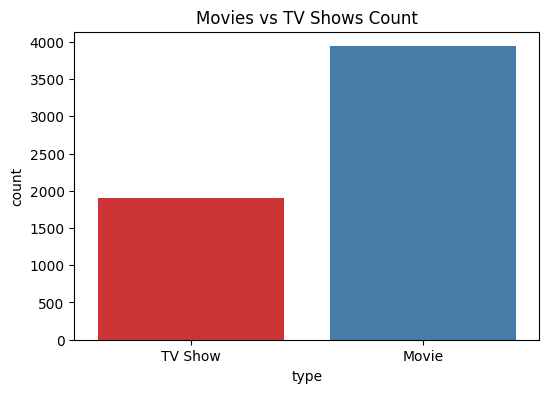

<ipython-input-4-8ac6f13da9e1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette='magma')


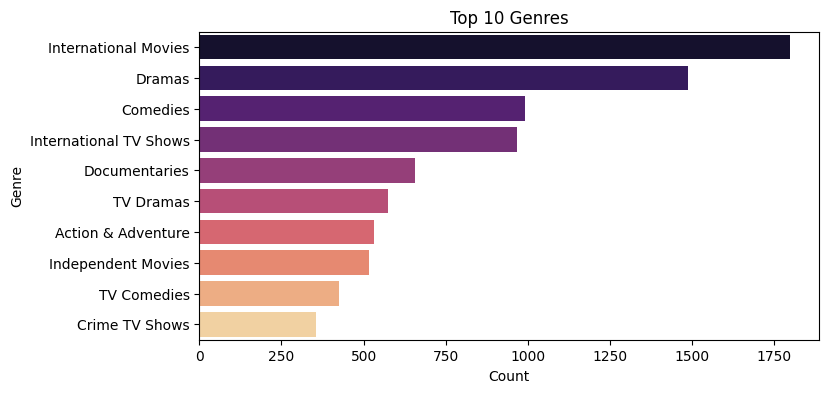

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessing 'country' and 'genres' columns
# Create a 'country_list' column if not already there
df['country_list'] = df['country'].fillna('').apply(lambda x: [c.strip() for c in x.split(',')] if x else [])

# Create a 'genres' list column if not already there
df['genres'] = df['listed_in'].fillna('').apply(lambda x: [g.strip() for g in x.split(',')] if x else [])

# Create 'month_added' from 'date_added' column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

# Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Movies vs TV Shows Count')
plt.show()

# Genre distribution
genre_counter = Counter(sum(df['genres'], []))
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(8,4))
sns.barplot(data=top_genres, y='Genre', x='Count', palette='magma')
plt.title('Top 10 Genres')
plt.show()


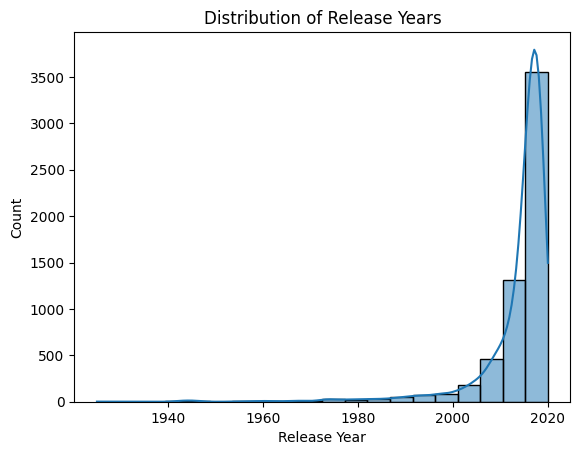

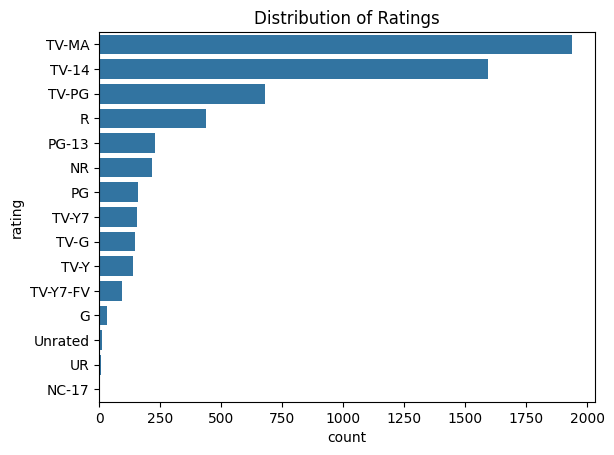

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of release years
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

# Ratings distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()


🔍 Hypothesis Testing:
  Null Hypothesis (H₀): There is no significant difference in the mean release years between PG and R ratings.
  Alternative Hypothesis (H₁): There is a significant difference in the mean release years between PG and R ratings.

Manual T-test Calculation:
  Mean of PG: 2008.54
  Mean of R: 2009.81
  T-statistic: -1.23
  Degrees of Freedom (Approx.): 253.52
  P-value: 0.2188
Conclusion: Fail to reject the null hypothesis – no significant difference in release years between PG and R ratings.


<ipython-input-6-ebe87730a637>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['rating'].isin(['PG', 'R'])], x='rating', y='release_year', palette='coolwarm')


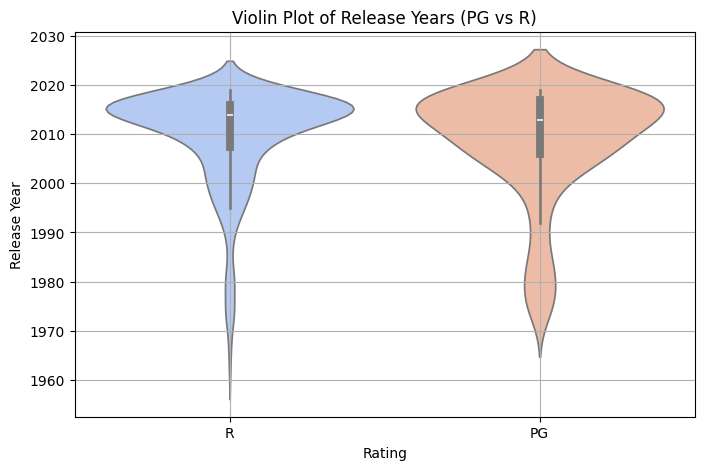

In [ ]:
#T-test analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t as t_dist

# Load dataset
df = pd.read_csv("/content/netflix_titles_nov_2019.csv")

# Drop missing values in 'rating' and 'release_year'
df.dropna(subset=['rating', 'release_year'], inplace=True)

# Select two rating groups for comparison
group1 = df[df['rating'] == 'PG']['release_year']
group2 = df[df['rating'] == 'R']['release_year']

# Initial Hypothesis
print("🔍 Hypothesis Testing:")
print("  Null Hypothesis (H₀): There is no significant difference in the mean release years between PG and R ratings.")
print("  Alternative Hypothesis (H₁): There is a significant difference in the mean release years between PG and R ratings.")
print()

# T-test formula calculation
mean1 = group1.mean()
mean2 = group2.mean()
var1 = group1.var(ddof=1)
var2 = group2.var(ddof=1)
n1 = len(group1)
n2 = len(group2)

# T-statistic formula
t_stat = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

# Degrees of freedom approximation (Welch-Satterthwaite equation)
df_approx = ((var1 / n1 + var2 / n2) ** 2) / (((var1 / n1) ** 2 / (n1 - 1)) + ((var2 / n2) ** 2 / (n2 - 1)))

# Print results
print(f"Manual T-test Calculation:")
print(f"  Mean of PG: {mean1:.2f}")
print(f"  Mean of R: {mean2:.2f}")
print(f"  T-statistic: {t_stat:.2f}")
print(f"  Degrees of Freedom (Approx.): {df_approx:.2f}")

# For the p-value, use scipy's t-distribution function (two-tailed)
p_val = 2 * (1 - t_dist.cdf(abs(t_stat), df_approx))
print(f"  P-value: {p_val:.4f}")

# Conclusion based on p-value
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis – there is a significant difference in release years between PG and R ratings.")
else:
    print("Conclusion: Fail to reject the null hypothesis – no significant difference in release years between PG and R ratings.")

# 🎻 Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[df['rating'].isin(['PG', 'R'])], x='rating', y='release_year', palette='coolwarm')
plt.title("Violin Plot of Release Years (PG vs R)")
plt.xlabel("Rating")
plt.ylabel("Release Year")
plt.grid(True)
plt.show()



Linear Regression Mean Squared Error: 746.1765852242532


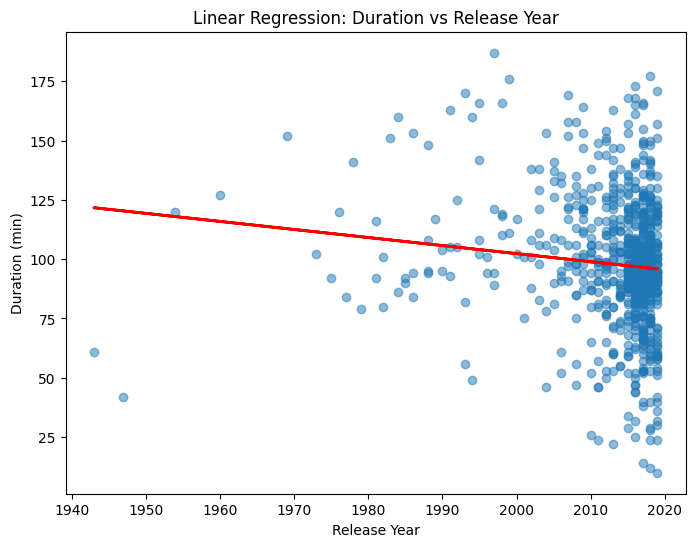

In [ ]:
#linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/netflix_titles_nov_2019.csv")

# Clean data: Drop rows with missing type, duration, or release year
df.dropna(subset=["type", "duration", "release_year"], inplace=True)

# Extract numerical duration from the string
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)

# Linear Regression: Predicting Duration from Release Year
df_lin = df[df['type'] == 'Movie']  # Focus only on movies for linear regression

# Prepare the data
X_lin = df_lin[['release_year']]
y_lin = df_lin['duration_mins']

# Split data into train and test sets
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=0)

# Fit Linear Regression model
lin_model = LinearRegression().fit(X_train_lin, y_train_lin)

# Predict and calculate MSE
y_pred_lin = lin_model.predict(X_test_lin)
print("\nLinear Regression Mean Squared Error:", mean_squared_error(y_test_lin, y_pred_lin))

# Plotting Linear Regression: Duration vs Release Year
plt.figure(figsize=(8, 6))
plt.scatter(X_test_lin, y_test_lin, alpha=0.5)
plt.plot(X_test_lin, y_pred_lin, color='red', lw=2)
plt.title("Linear Regression: Duration vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.show()


<ipython-input-8-ca661be394f6>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_content = df.resample('M').size()


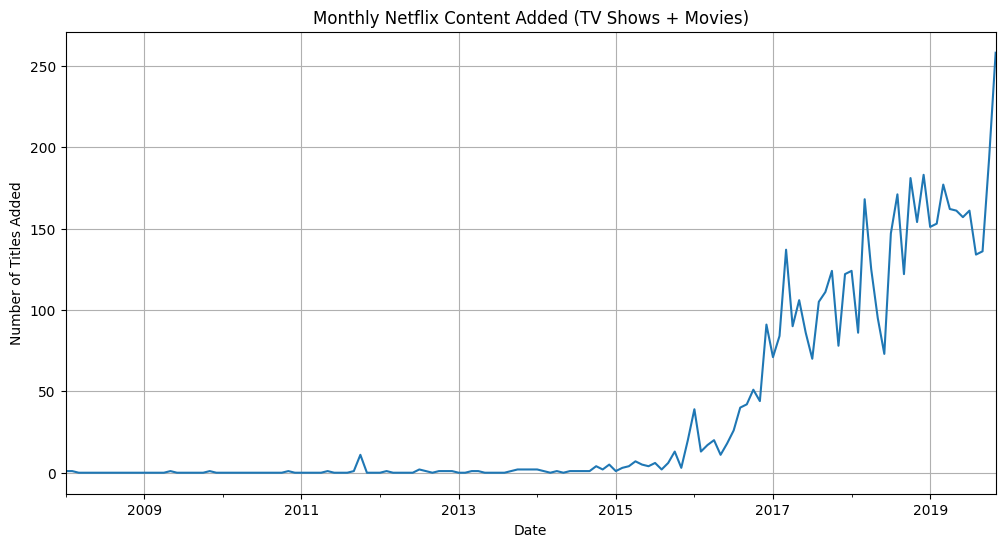

ADF Statistic: 2.851585927036576
p-value: 1.0
Series is non-stationary, applying differencing.
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  142
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -609.475
Date:                Tue, 13 May 2025   AIC                           1224.951
Time:                        09:06:47   BIC                           1233.797
Sample:                    02-29-2008   HQIC                          1228.546
                         - 11-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3510      0.043     -8.226      0.000      -0.435      -0.267
ma.L1         -0.9774      0.024    

<ipython-input-8-ca661be394f6>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_content.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


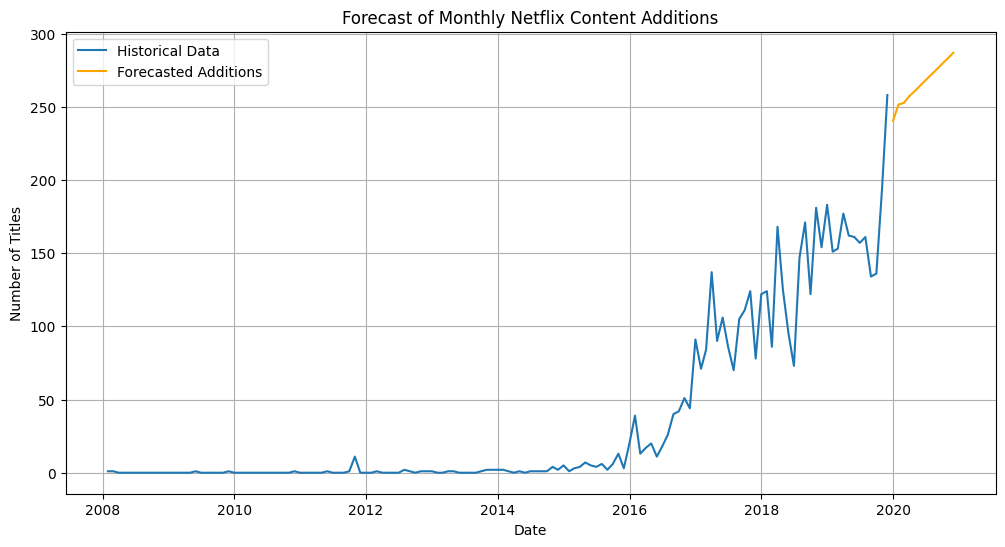

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Data Preparation
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')  # Update path if needed

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)

# Set date as index and sort
df.set_index('date_added', inplace=True)
df.sort_index(inplace=True)

# Resample by month and count shows/movies added
monthly_content = df.resample('M').size()

# Step 2: EDA - Plotting the Time Series
plt.figure(figsize=(12, 6))
monthly_content.plot()
plt.title("Monthly Netflix Content Added (TV Shows + Movies)")
plt.ylabel("Number of Titles Added")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Step 3: Check for Stationarity using ADF Test
adf_result = adfuller(monthly_content)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Step 4: Differencing if non-stationary
if adf_result[1] > 0.05:
    print("Series is non-stationary, applying differencing.")
    monthly_content_diff = monthly_content.diff().dropna()
else:
    print("Series is stationary.")
    monthly_content_diff = monthly_content

# Step 5: Model Training (ARIMA)
model = ARIMA(monthly_content_diff, order=(1, 1, 1))  # You can tune these params
model_fit = model.fit()
print(model_fit.summary())

# Step 6: Forecasting
forecast_steps = 12  # Forecast for 12 future months
forecast_diff = model_fit.forecast(steps=forecast_steps)

# Reverse differencing to get actual forecast
last_value = monthly_content.iloc[-1]
forecast = forecast_diff.cumsum() + last_value

# Step 7: Visualization of Forecast
future_dates = pd.date_range(start=monthly_content.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(monthly_content, label='Historical Data')
plt.plot(future_dates, forecast, label='Forecasted Additions', color='orange')
plt.title("Forecast of Monthly Netflix Content Additions")
plt.ylabel("Number of Titles")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()
